# Homework4 [Project] 
#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/26 (Tues)  11:59 PM [NO LATE HAND IN(Late hand in will get 0), because of school grade policy]

### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
- __This is project assignment. We can not reply your questions about technical(code) issues.__
- __이번 과제는 프로젝트 과제입니다. 소스코드와 같은 기술적인 질문에는 답변 드릴 수 없습니다.__

<br>
<br>
*Perform the steps described below for each dataset(2 Project).*
>0. Preprocess; normalization, feature selection, etc.
>1. Model selection; characteristics of datasets need to be comprehended.
>2. Evaluation; This step should be done properly to prevent overfitting problem.
>3. Enhancement; parameter tuning and feature selection, etc.

### When you make your model for this Project, you should use scikit learn. Don't use other ML package.
### Of course you can use any packages for handling your data. (pandas, numpy, matplotlib, random etc.)
### Download your data in *https://www.dropbox.com/sh/6s4e0z9fhenfw6z/AADkJO3Z6WN1b8IJhkVp9KgDa?dl=0*

## Project 1
### h1b data [h1b_train, h1b_dev, h1b_test]

- Use h1b __train data__ for train your model.
- Tune your model with __dev data__.
- Finally check your best performed model score with __test data__.
- __*You should clean your train dev test data first!!*__
- Score function : Accuracy
<br>
<br>
- __Your goal is to predict CASE_STATUS, using other features.__
- You can choose the features you want to use in your project.

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

## Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
h1b_train = pd.read_csv('./data/h1b_train.csv',index_col = 0)
h1b_dev = pd.read_csv('./data/h1b_dev.csv', index_col = 0)
h1b_test = pd.read_csv('./data/h1b_test.csv', index_col = 0)

/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
h1b_train.shape, h1b_dev.shape, h1b_test.shape

((1802458, 10), (600000, 10), (600000, 10))

In [4]:
h1b_train.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
1617140,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
2757905,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
1127948,WITHDRAWN,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,SOLUTIONS ARCHITECT,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949


## Pre-processing

In [5]:
h1b_train.fillna(np.nan, inplace = True)
h1b_dev.fillna(np.nan, inplace = True)
h1b_test.fillna(np.nan, inplace = True)

In [6]:
for column in h1b_train.columns:
    print(column, len(h1b_train[column].unique()))

CASE_STATUS 7
EMPLOYER_NAME 186262
SOC_NAME 1880
JOB_TITLE 209569
FULL_TIME_POSITION 3
PREVAILING_WAGE 46569
YEAR 7
WORKSITE 15600
lon 2406
lat 2408


#### 데이터의  양이 너무 많아, 학습에 엄청나게 많은 시간이 소요되어 시간관계상 부득이하게 데이터의 양을 1/10 로 축소하여 사용하였습니다.
* 추후 One-hot Encoding 을 사용할 것이며, Sparse 한 Matrix 를 만들어 학습하기에, 학습 시간이 매우 오래 걸립니다.

In [7]:
h1b_train = h1b_train[:180000]
h1b_dev = h1b_dev[:60000]
h1b_test = h1b_test[:60000]

In [8]:
h1b_train_X = h1b_train.drop(['CASE_STATUS'], axis = 1)
h1b_dev_X = h1b_dev.drop(['CASE_STATUS'], axis = 1)
h1b_test_X = h1b_test.drop(['CASE_STATUS'], axis = 1)

In [9]:
h1b_train_y = h1b_train['CASE_STATUS']
h1b_dev_y = h1b_dev['CASE_STATUS']
h1b_test_y = h1b_test['CASE_STATUS']

In [10]:
h1b_train_X.head()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1349742,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
789205,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
1617140,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
2757905,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
1127948,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,SOLUTIONS ARCHITECT,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949


In [11]:
h1b_train_y.head()

1349742    CERTIFIED
789205     CERTIFIED
1617140    CERTIFIED
2757905    CERTIFIED
1127948    WITHDRAWN
Name: CASE_STATUS, dtype: object

#### Unique 한 Values 가 꽤 많은 EMPLOYER_NAME, JOB_TITLE Columns 은 제외하고 사용하였습니다.

In [12]:
h1b_train_X = h1b_train_X.drop(['EMPLOYER_NAME', 'JOB_TITLE'], axis = 1)
h1b_dev_X = h1b_dev_X.drop(['EMPLOYER_NAME', 'JOB_TITLE'], axis = 1)
h1b_test_X = h1b_test_X.drop(['EMPLOYER_NAME', 'JOB_TITLE'], axis = 1)

In [13]:
h1b_train_X.head()

,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1349742,Computer Programmers,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
789205,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
1617140,"Computer Occupations, All Other",Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
2757905,Orthotists and Prosthetists,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
1127948,COMPUTER SYSTEMS ANALYSTS,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949


### One-hot encoding

In [14]:
h1b_train_X_Onehot = pd.get_dummies(h1b_train_X, sparse = True)
h1b_dev_X_Onehot = pd.get_dummies(h1b_dev_X, sparse = True)
h1b_test_X_Onehot = pd.get_dummies(h1b_test_X, sparse = True)

#### Nan Data 처리

In [15]:
h1b_train_X_Onehot.fillna(-1, inplace = True)
h1b_dev_X_Onehot.fillna(-1, inplace = True)
h1b_test_X_Onehot.fillna(-1, inplace = True)

In [16]:
h1b_train_y.fillna('NaN', inplace = True)
h1b_dev_y.fillna('NaN', inplace = True)
h1b_test_y.fillna('NaN', inplace = True)

In [17]:
h1b_train_X_Onehot.columns

Index(['PREVAILING_WAGE', 'YEAR', 'lon', 'lat',
       'SOC_NAME_15-1199.01 SW QUALITY ASSURANCE ENGNRS & TESTERS',
       'SOC_NAME_17-2072', 'SOC_NAME_ACCOUNTANTS',
       'SOC_NAME_ACCOUNTANTS AND AUDITORS', 'SOC_NAME_ACTUARIES',
       'SOC_NAME_ADMINISTRATIVE SERVICES MANAGERS',
       ...
       'WORKSITE_YUMA, ARIZONA', 'WORKSITE_YUMA, COLORADO',
       'WORKSITE_ZANESVILLE, OHIO', 'WORKSITE_ZEELAND, MICHIGAN',
       'WORKSITE_ZELIENOPLE, PENNSYLVANIA', 'WORKSITE_ZEPHYR COVE, NEVADA',
       'WORKSITE_ZEPHYRHILLS, FLORIDA', 'WORKSITE_ZION, ILLINOIS',
       'WORKSITE_ZIONSVILLE, INDIANA', 'WORKSITE_ZUNI, NEW MEXICO'],
      dtype='object', length=7634)

In [18]:
h1b_train_X_Onehot.shape, h1b_train_y.shape

((180000, 7634), (180000,))

#### Columns 개수가 Train, Dev, Test 데이터 각각에 대해 서로 달라, 중복되지 않은 Columns 을 제거해서 학습에 이용하였습니다.

In [19]:
len(h1b_train_X_Onehot.columns), len(h1b_dev_X_Onehot.columns), len(h1b_test_X_Onehot.columns)

(7634, 4965, 4919)

In [20]:
h1b_train_X_Onehot_column_set = set(h1b_train_X_Onehot.columns)
h1b_dev_X_Onehot_column_set = set(h1b_dev_X_Onehot.columns)
h1b_test_X_Onehot_column_set = set(h1b_test_X_Onehot.columns)

In [21]:
columns = h1b_train_X_Onehot_column_set.intersection(h1b_dev_X_Onehot_column_set).intersection(h1b_test_X_Onehot_column_set)

In [22]:
h1b_train_X_Onehot_common = h1b_train_X_Onehot[list(columns)]
h1b_dev_X_Onehot_common = h1b_dev_X_Onehot[list(columns)]
h1b_test_X_Onehot_common = h1b_test_X_Onehot[list(columns)]

In [23]:
X = h1b_train_X_Onehot_common
y = h1b_train_y

## classification

In [24]:
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#### Classification 모델 개발을 위해 하단의 모델을 사용하였습니다.
* 수업시간에 다룬 Linear SVM, Logistic Regression, MLP 모델에 대해 파라미터를 달리 하여 학습하였습니다.

In [25]:
names = ['Linear SVM', 'Linear SVM', 'Logistic Regression', 'Logistic Regression', 'MLP', 'MLP', 'MLP', 'MLP']

In [26]:
classifiers = [LinearSVC(penalty = 'l2', random_state = 0, dual = False, verbose = 1, multi_class = 'ovr'),
               LinearSVC(penalty = 'l1', random_state = 0, dual = False, verbose = 1, multi_class = 'ovr'),
               LogisticRegression(penalty = 'l1', n_jobs = -1, random_state = 0, verbose = 1, solver = 'saga', multi_class = 'ovr'),
               LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 0, verbose = 1, solver = 'sag', multi_class = 'ovr'),
               MLPClassifier(solver='adam', hidden_layer_sizes=(30, 10), random_state=0, verbose = 1),
               MLPClassifier(solver='adam', hidden_layer_sizes=(50, 30), random_state=0, verbose = 1),
               MLPClassifier(solver='adam', hidden_layer_sizes=(100, 50), random_state=0, verbose = 1),
               MLPClassifier(solver='adam', hidden_layer_sizes=(50, 30, 10), random_state=0, verbose = 1)
              ]

#### 모델 저장을 위해 pickle 을 사용하였습니다.

In [27]:
import pickle

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Train

In [29]:
evaluations = []

for name, clf in zip(names, classifiers):
    clf.fit(X, y)
    y_pred = clf.predict(h1b_dev_X_Onehot_common)
    
    model_accuracy = accuracy_score(y_pred, h1b_dev_y)
    model_precision = precision_score(y_pred, h1b_dev_y, average = 'weighted')
    model_recall = recall_score(y_pred, h1b_dev_y, average = 'weighted')
    model_f1 = f1_score(y_pred, h1b_dev_y, average = 'weighted')
    
    evaluations.append([clf, name, model_accuracy, model_precision, model_recall, model_f1])
    
    with open('evaluations.data', 'wb') as f:
        pickle.dump(evaluations, f)

[LibLinear]

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[LibLinear]

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


max_iter reached after 1248 seconds


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1256 seconds
max_iter reached after 1272 seconds
max_iter reached after 1276 seconds
max_iter reached after 1278 seconds
max_iter reached after 1298 seconds


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 21.6min finished


max_iter reached after 690 seconds
max_iter reached after 690 seconds
max_iter reached after 690 seconds
max_iter reached after 694 seconds
max_iter reached after 694 seconds
max_iter reached after 694 seconds


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 11.6min finished


Iteration 1, loss = 1.51609587
Iteration 2, loss = 0.73915331
Iteration 3, loss = 0.61055564
Iteration 4, loss = 0.56872490
Iteration 5, loss = 0.55280451
Iteration 6, loss = 0.53945484
Iteration 7, loss = 0.53301621
Iteration 8, loss = 0.52890388
Iteration 9, loss = 0.52623425
Iteration 10, loss = 0.52446269
Iteration 11, loss = 0.52324786
Iteration 12, loss = 0.52241558
Iteration 13, loss = 0.52183451
Iteration 14, loss = 0.56784636
Iteration 15, loss = 0.52128891
Iteration 16, loss = 0.52115346
Iteration 17, loss = 0.52106284
Iteration 18, loss = 0.52099178
Iteration 19, loss = 0.52093395
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 6.64860881
Iteration 2, loss = 4.52312669
Iteration 3, loss = 3.37017951
Iteration 4, loss = 3.82111145
Iteration 5, loss = 1.74456602
Iteration 6, loss = 0.69463261
Iteration 7, loss = 0.54715787
Iteration 8, loss = 0.52822269
Iteration 9, loss = 0.52652363
Iteration 10, loss = 0.52344068

In [30]:
with open('evaluations.data', 'rb') as f:
        evaluations = pickle.load(f)

### Validation

In [31]:
evaluations.sort(key = lambda evaluations: evaluations[2])
evaluations.reverse()

In [32]:
for evaluation in evaluations:
    print("-----" * 10)
    print(evaluation[1])
    print("Accuracy: ", evaluation[2])
    print("Precision, Recall, F1: ", evaluation[3:6])
    print(evaluation[0])
    print("-----" * 10, end = "\n\n")

--------------------------------------------------
Logistic Regression
Accuracy:  0.8719833333333333
Precision, Recall, F1:  [0.9992910227455276, 0.8719833333333333, 0.9309930055024827]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=1, warm_start=False)
--------------------------------------------------

--------------------------------------------------
Logistic Regression
Accuracy:  0.8719833333333333
Precision, Recall, F1:  [0.9992910227455276, 0.8719833333333333, 0.9309930055024827]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=0, solver='saga', tol=0.0001,
          verbose=1, warm_start=False)
--------------------------------------------------

---------

### Test
* 가장 우수한 한 모델이 실제 Domain 데이터에서 어떤 성능을 보일지 아래와 같이 테스트 해보았습니다.

In [33]:
y_pred = evaluations[0][0].predict(h1b_test_X_Onehot_common)

model_accuracy = accuracy_score(y_pred, h1b_test_y)
model_precision = precision_score(y_pred, h1b_test_y, average = 'weighted')
model_recall = recall_score(y_pred, h1b_test_y, average = 'weighted')
model_f1 = f1_score(y_pred, h1b_test_y, average = 'weighted')

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [34]:
print("Accuracy: " + str(model_accuracy))
print("Precision: " + str(model_precision))
print("Recall: " + str(model_recall))
print("F1 score: " + str(model_f1))

Accuracy: 0.8718333333333333
Precision: 0.9994097843240399
Recall: 0.8718333333333333
F1 score: 0.9309926859776103


## Project 2
### AAAI Accepted Papers

- Cluster papers using AAAI Accepted Papers data [use __'title'__ as primary key].
- Visualize your clustering result and explain it.
<br>
<br>
- __Your goal is to show clustering result with AAAI Accepted Papers.__
- __You must use 'abstract' feature.__ 
- You can choose the features you want to use in your project.

### Attribute Information

- __Title__
    - Free text; title of the paper 
<br>
<br>
- Groups
    - Categorical; author-selected, high-level keyword(s) 
<br>
<br>
- Keywords
    - Free text; author-generated keywords 
<br>
<br>
- Topics
    - Free text; author-selected, low-level keywords 
<br>
<br>
- __Abstracts__
    - Free text; paper abstracts

## Import Dataset

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [36]:
accepted_papers = pd.read_csv('./data/AAAI_Accepted_Papers.csv', encoding = "ISO-8859-1")

In [37]:
accepted_papers.head()

,title,groups,keywords,topics,abstract
0,The cascade auction ??a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Multiagent Systems,Auctions and Market-Based Systems\nE-Commerce\...,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Machine Learning\nReasoning under Uncertainty,Dimension Reduction/Feature Selection\nOnline ...,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Multiagent Systems,Coordination and Collaboration\nGame Theory,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search and Optimization,Heuristic Search\nEvaluation and Analysis (Sea...,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising\nDynamic Pricing\nMarket E...,Multiagent Systems,Auctions and Market-Based Systems\nE-Commerce\...,We propose a new market design for display adv...


## Pre-processing

In [38]:
accepted_papers.fillna('NaN', inplace = True)

In [39]:
for column in accepted_papers.columns:
    print(column, len(accepted_papers[column].unique()))

title 548
groups 276
keywords 456
topics 490
abstract 548


#### groups column 에 있는 unique 한 상위 카테고리의 개수가 몇개인지 알아보기 위해 돌려보았습니다.
* 만약 unique 한 카테고리 개수가 적었다면, 해당 개수를 K로 삼아 K-means Clustering 을 돌리려고 하였습니다.

In [40]:
Groups = np.sort(accepted_papers['groups'].unique())
Groups = {a.split("\n")[0] for a in Groups}

In [41]:
len(Groups)

167

위에서 아이디어를 착안하여, 각 columns 의 unique 한 values 들이 어떤 특성을 가지고 있는지 대략적으로 알아보기 위해 다음과 같은 실험을 진행했습니다.

In [42]:
groups = np.sort(accepted_papers['groups'].unique())
keywords = np.sort(accepted_papers['keywords'].unique())
topics = np.sort(accepted_papers['topics'].unique())

In [43]:
groups

array(['AI and the Web (AIW)', 'AI and the Web (AIW)\nApplications (APP)',
       'AI and the Web (AIW)\nApplications (APP)\nHeuristic Search and Optimization (HSO)\nPlanning and Scheduling (PS)',
       'AI and the Web (AIW)\nApplications (APP)\nHuman-Computation and Crowd Sourcing (HCC)\nMachine Learning Applications (MLA)\nNovel Machine Learning Algorithms (NMLA)',
       'AI and the Web (AIW)\nApplications (APP)\nMachine Learning Applications (MLA)',
       'AI and the Web (AIW)\nApplications (APP)\nNLP and Knowledge Representation (NLPKR)\nRobotics (ROB)',
       'AI and the Web (AIW)\nApplications (APP)\nNLP and Machine Learning (NLPML)\nNLP and Text Mining (NLPTM)',
       'AI and the Web (AIW)\nApplications (APP)\nNovel Machine Learning Algorithms (NMLA)',
       'AI and the Web (AIW)\nHumans and AI (HAI)\nMachine Learning Applications (MLA)\nVision (VIS)',
       'AI and the Web (AIW)\nKnowledge Representation and Reasoning (KRR)',
       'AI and the Web (AIW)\nKnowledge Repre

In [44]:
keywords

array(['#NAME?',
       'ABox abduction\nabductive reasoning\nquery abduction problem\ndescription logics\nfirst-order rewritable',
       'Active learning\nMultiple labelers\nKnowledge transfer',
       'Adaptation-Guided Case-Based Maintenance\nCase-Based Maintenance\nCase-Based Reasoning',
       'Answer Set Programming\nExternal Sources\nDescription Logic Programs',
       'Applications\nMultidisciplinary Topics',
       'Applications\nMultidisciplinary Topics\nRobotics',
       'Approximate Nash Equilibrium\nCoordination Games\nPrice of Stability\nPrice of Anarchy\nNetwork Games',
       'Automatic statistician\ngaussian processes\nregression\nbayesian\nsummarization\nmodel description',
       'Autonomous Electricity Trading Agents\nMachine Learning\nReinforcement Learning\nOnline Learning\nSmart Grid\nTrading agents competition\nSustainable Energy',
       'Bag-of-words Model\nMid-level Representations\nLocality Coding\nLow-rank Coding\nInexact Augmented Lagrange Multiplier',
  

In [45]:
topics

array(['AIW: AI for multimedia and multimodal web applications',
       'AIW: AI for multimedia and multimodal web applications\nAIW: Enhancing web search and information retrieval\nAIW: Machine learning and the web',
       'AIW: AI for multimedia and multimodal web applications\nMLA: Applications of Supervised Learning\nMLA: Machine Learning Applications (General/other)',
       'AIW: AI for multimedia and multimodal web applications\nMLA: Machine Learning Applications (General/other)',
       'AIW: AI for web services: semantic descriptions, planning, matching, and coordination',
       'AIW: AI for web services: semantic descriptions, planning, matching, and coordination\nAPP: Other Applications\nHSO: Optimization\nPS: Deterministic Planning\nPS: Planning (General/Other)',
       'AIW: AI for web services: semantic descriptions, planning, matching, and coordination\nKRR: Action, Change, and Causality\nPS: Temporal Planning',
       'AIW: Crowdsourcing techniques and methodologies\n

#### 학습에 사용할 Attributes 선택
* Abstract 문장 길이와 단어 수에 비해 groups, keywords, topics 의 string 길이와 문장을 이루는 단어 수는 작다고 생각하였습니다.
* 하지만 Document 를 Clustering 할 때 Abstract 보다는 groups, keywords, topics 이 더 큰 영향을 끼칠 것이라고 판단하였고,
* 따라서 제가 중요하다고 생각하는 기준에 rank 를 매겨 다음과 같은 데이터를 사용하여 Clustering 을 진행하였습니다.

In [46]:
accepted_papers['data'] = str()

In [47]:
columns = ['abstract',
           'title', 'title',
           'keywords', 'keywords', 'keywords',
           'topics', 'topics', 'topics', 'topics',
           'groups', 'groups', 'groups', 'groups', 'groups']

In [48]:
for column in columns:
    accepted_papers['data'] += accepted_papers[column]

In [49]:
accepted_papers['data'][0]

'We introduce a sealed bid auction of a single item in which\nthe winner is chosen at random among the highest k bidders\naccording to a fixed probability distribution, and the price for\nthe chosen winner is the Vickrey-Clarke-Groves price. We\ncall such an auction a cascade auction. Our analysis suggests\nthat this type of auction may give higher revenues compared\nto second price auction in cases of collusion.The cascade auction ??a mechanism for deterring collusion in auctionsThe cascade auction ??a mechanism for deterring collusion in auctionsMultiagent SystemsMultiagent SystemsMultiagent SystemsAuctions and Market-Based Systems\nE-Commerce\nGame Theory\nMechanism DesignAuctions and Market-Based Systems\nE-Commerce\nGame Theory\nMechanism DesignAuctions and Market-Based Systems\nE-Commerce\nGame Theory\nMechanism DesignAuctions and Market-Based Systems\nE-Commerce\nGame Theory\nMechanism DesignMediators\nAuctions\nCollusion\nAd ExchangesMediators\nAuctions\nCollusion\nAd Exchanges

#### TF-IDF 이용
* stop_words : english
* ngram_range: (1, 3)

In [50]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 3)).fit(accepted_papers['data'])
tfidf_matrix = tfidf_vectorizer.transform(accepted_papers['data'])
tfidf_matrix

<548x119237 sparse matrix of type '<class 'numpy.float64'>'
	with 175103 stored elements in Compressed Sparse Row format>

In [51]:
X = tfidf_vectorizer.fit_transform(accepted_papers['data'])

### Training
* 학습할 때 동시에 Top terms per cluster 출력 (학습이 잘 되는지 대략 파악)

In [52]:
num_clusters_list = [i for i in range(1, 30)]
clusters_list = []
clusters_errors = []

for true_k in num_clusters_list:
    km = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init = 1)
    km.fit(X)
    clusters_list.append([true_k, km.labels_.tolist()])
    clusters_errors.append(km.inertia_)
    
    print("-----" * 15)
    print("Top terms per cluster:")
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf_vectorizer.get_feature_names()
    for i in range(true_k):
        print ("Cluster %d: " % i, end = "")
        for ind in order_centroids[i, :10]:
            print ("%s, " % terms[ind], end = "")
        print("")
    print("-----" * 15, end = "\n\n")

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: learning, nmla, machine, machine learning, planning, reasoning, search, applications, game, krr, 
---------------------------------------------------------------------------

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: planning, reasoning, game, gtep, krr, theory, search, ps, game theory, mas, 
Cluster 1: learning, nmla, machine, machine learning, applications, mla, learning algorithms, machine learning algorithms, algorithms nmla, learning algorithms nmla, 
---------------------------------------------------------------------------

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: gtep, game, theory, game theory, economic, theory economic paradigms, paradigms gtep, economic paradigms, theory economic, economic paradigms gtep, 
Cluster 1: planning, sear

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: language, natural language, natural, nlp, language processing, natural language processing, processing, nlpml, text, language processing general, 
Cluster 1: nmla, learning, machine learning, machine, learning algorithms, machine learning algorithms, algorithms nmla, learning algorithms nmla, novel machine learning, novel machine, 
Cluster 2: learning, web, social, applications, aiw, machine, mla, ai, machine learning, web aiw, 
Cluster 3: mas, gtep, game, multiagent, multiagent systems, systems mas, theory, game theory, systems, multiagent systems mas, 
Cluster 4: planning, ps, scheduling, scheduling ps, planning scheduling ps, planning scheduling, search, ps planning, reasoning, planning general, 
Cluster 5: krr, reasoning, reasoning krr, knowledge representation, knowledge, representation, representation reasoning krr, representation reasoning, krr knowledge, krr knowledge r

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: clustering, view, rank, vis, multi view, low rank, learning, multi, low, matrix, 
Cluster 1: gtep, mas, theory, game theory, game, economic, economic paradigms, theory economic, theory economic paradigms, economic paradigms gtep, 
Cluster 2: ru, uncertainty, probabilistic, uncertainty ru, reasoning uncertainty ru, reasoning uncertainty, planning, ps, reasoning, relational, 
Cluster 3: learning, mla, applications, machine learning, machine, learning applications, machine learning applications, nmla, applications mla, learning applications mla, 
Cluster 4: language, natural language, natural, language processing, nlpml, nlp, natural language processing, processing, processing general, language processing general, 
Cluster 5: scs, constraint, satisfaction, constraint satisfaction, constraint satisfaction scs, satisfaction scs, search constraint satisfaction, search constraint, sat

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: learning, transfer, nmla, kernel, adaptation, learning algorithms, algorithms nmla, learning algorithms nmla, machine learning algorithms, algorithms nmla novel, 
Cluster 1: distributed, scs, mas, constraint, solving, problem solving, search, satisfaction, distributed csp, distributed problem solving, 
Cluster 2: gtep, mas, multiagent, equilibrium, game, multiagent systems, theory, game theory, coordination, games, 
Cluster 3: krr, reasoning, reasoning krr, knowledge representation, representation, knowledge, krr knowledge representation, krr knowledge, representation reasoning krr, representation reasoning, 
Cluster 4: learning, nmla, online, ranking, online learning, scalability, data scalability, hai, supervised, big, 
Cluster 5: language, natural language, natural, language processing, nlpml, nlp, natural language processing, processing, language processing general, process

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: hash, table, minimax, nearest, clustering, clustering integer, higher order, based dissimilarity, dissimilarity, integer, 
Cluster 1: learning, nmla, machine learning, machine, applications, learning algorithms nmla, algorithms nmla, machine learning algorithms, learning algorithms, novel machine, 
Cluster 2: web, krr, ontologies, aiw, knowledge, web aiw, knowledge representation, representation, description, reasoning, 
Cluster 3: search, heuristic, hso, heuristic search, search optimization, optimization, optimization hso, search optimization hso, heuristic search optimization, evaluation analysis, 
Cluster 4: mas, gtep, game, theory, game theory, multiagent, multiagent systems, systems, mechanism, systems mas, 
Cluster 5: learning, ru, nmla, decision, sequential decision, sequential, online, uncertainty, hai, online learning, 
Cluster 6: scs, constraint, satisfaction, constr

Cluster 17: cm, hai, modeling cm, humans, simulating, cognitive modeling, cognitive, cognitive modeling cm, modeling, simulating humans, 
Cluster 18: web, aiw, web aiw, ontologies, ai web aiw, ai web, alignment, extraction, web creation, merging alignment tags, 
Cluster 19: krr, description, reasoning, reasoning krr, krr knowledge representation, representation, krr knowledge, description logics, logics, knowledge representation, 
Cluster 20: gpie, game, playing, entertainment, interactive entertainment, game playing, interactive, playing interactive entertainment, entertainment gpie, playing interactive, 
Cluster 21: nlpml, nlp, learning nlpml, machine learning nlpml, nlp machine, nlp machine learning, language, learning, machine, machine learning, 
Cluster 22: choice, social choice, social, theory, gtep, economic paradigms, theory economic paradigms, theory economic, paradigms gtep, economic paradigms gtep, 
Cluster 23: krr, language, knowledge, reasoning, representation, natural lan

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: rank, low rank, low, matrix, aggregation, rank matrix, object, face, vis, coding, 
Cluster 1: hai, learning, applications, mla, human, interaction, learning applications, machine learning applications, ai hai, human computer interaction, 
Cluster 2: search, heuristic, hso, heuristic search, search optimization, optimization, optimization hso, search optimization hso, heuristic search optimization, evaluation analysis, 
Cluster 3: sentiment, model, language, natural language, bayesian, learning natural, learning natural language, metaphor, natural, latent, 
Cluster 4: applications, mla, learning, learning applications, applications mla, machine learning applications, machine, machine learning, learning applications mla, mla machine, 
Cluster 5: gtep, game, theory, game theory, choice, economic, theory economic paradigms, theory economic, economic paradigms, paradigms gtep, 
Clus

---------------------------------------------------------------------------
Top terms per cluster:
Cluster 0: nlpml, language, natural language, language processing, natural language processing, learning nlpml, processing, nlp, natural, language processing general, 
Cluster 1: gtep, game, mas, theory, game theory, mechanism, multiagent, multiagent systems, systems, systems mas, 
Cluster 2: nmla, learning, kernel, machine, machine learning, learning nmla, kernel methods, bayesian, learning algorithms nmla, algorithms nmla, 
Cluster 3: search, heuristic search, hso, scs, heuristic, sat, search optimization, optimization, optimization hso, constraint, 
Cluster 4: reasoning, change, causality, transportability, causal, change causality, ru, krr, reasoning krr reasoning, situation, 
Cluster 5: web, aiw, mining, web aiw, nlptm, text, learning, text mining, ai web aiw, ai web, 
Cluster 6: rob, robotics, localization, robotics rob, rob robotics, robot, rob robotics general, hai, planning, moti

#### Elbow Method 를 사용하여 적절한 K 값을 선택함

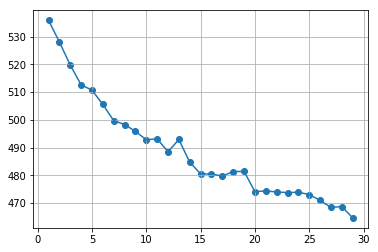

In [53]:
plt.scatter(num_clusters_list, clusters_errors)
plt.plot(num_clusters_list, clusters_errors)
plt.grid()
plt.show()

### Visualize

In [54]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_names = [i for i in range(1, 100)]

In [55]:
def visualize_clusters(xs, ys, clusters, cluster_names):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

K: 4


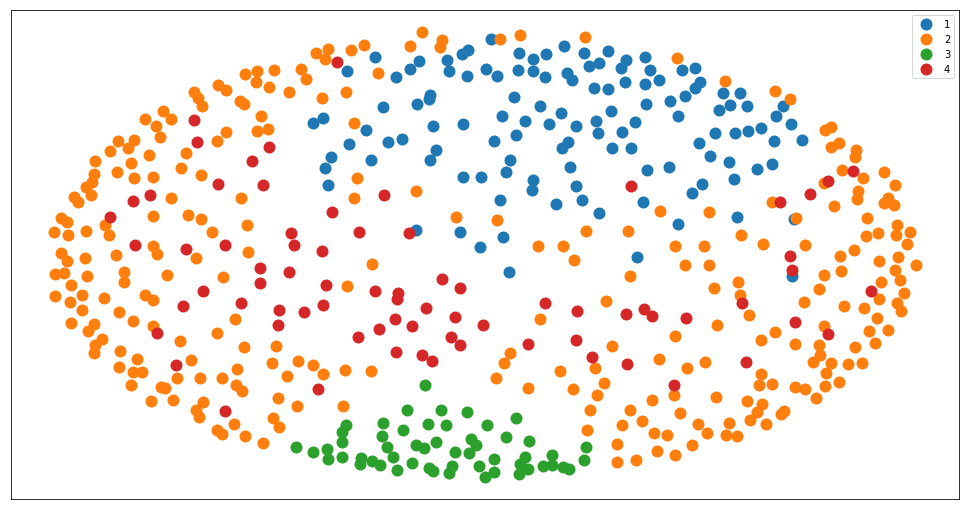

In [56]:
print("K: 4")
visualize_clusters(xs, ys, clusters_list[4 - 1][1], cluster_names)

K: 7


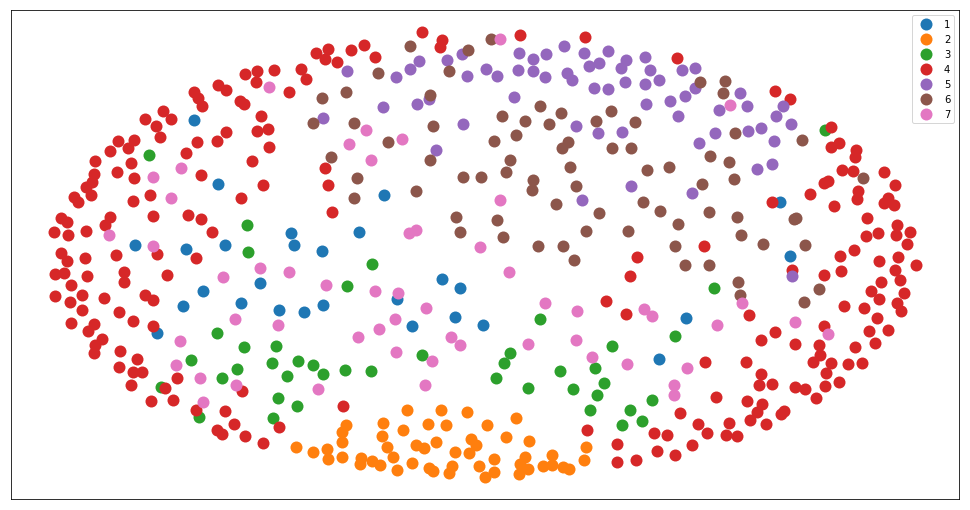

In [57]:
print("K: 7")
visualize_clusters(xs, ys, clusters_list[7 - 1][1], cluster_names)

K: 12


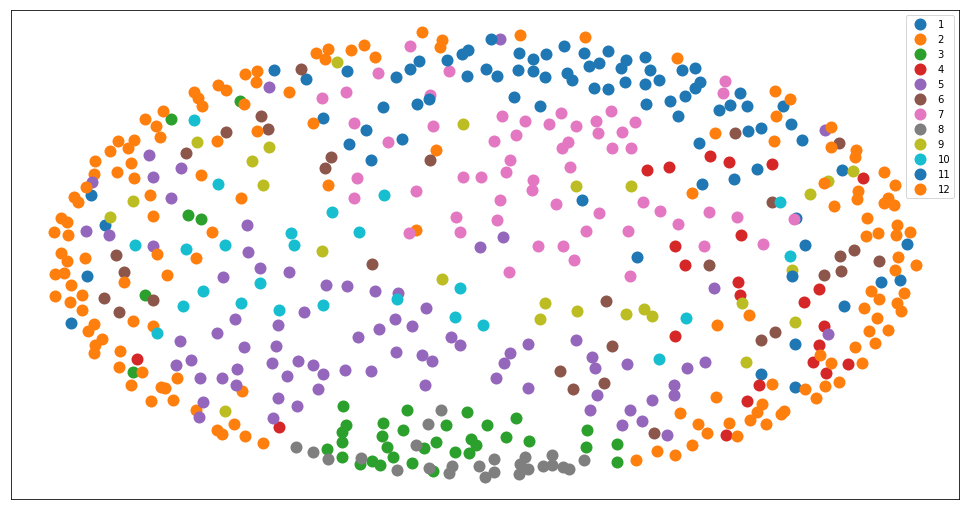

In [58]:
print("K: 12")
visualize_clusters(xs, ys, clusters_list[12 - 1][1], cluster_names)

K: 20


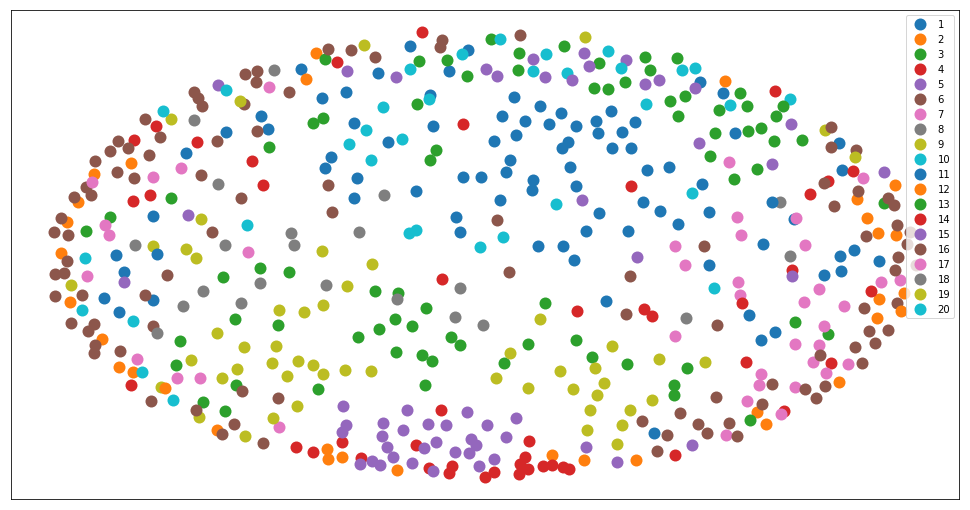

In [59]:
print("K: 20")
visualize_clusters(xs, ys, clusters_list[20 - 1][1], cluster_names)

# FIN
## You did a really good job for the short semester. Have a nice vacation!! :) 